#### Recapitulando o que foi visto sobre a matrix A da media móvel

In [1]:
import numpy as np
N = 5 # number of data
ws = 3 # window size
i0 = ws//2
A = np.array(
    np.hstack(
        ( (1./ws)*np.ones(ws), np.zeros(N - ws + 1))
    )
)
print('###1', 1/ws*np.ones(ws))
print("###2 ",np.zeros(N-ws+1))
print('###A ', A)

###1 [0.33333333 0.33333333 0.33333333]
###2  [0. 0. 0.]
###A  [0.33333333 0.33333333 0.33333333 0.         0.         0.        ]


In [2]:
A = np.resize(A, (N-2*i0, N))
A

array([[0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333]])

In [3]:
A = np.vstack((np.zeros(N), A, np.zeros(N)))
A

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

##### vamos testar a função da média móvel criada

In [4]:
import sys
sys.path.insert(1, 'C:\\Users\\7michelson\\Documents\\MCOM scripts\\Extra _ importante')
import bruno

In [5]:
# Exemplo de uso
data = np.array([1, 2, 3, 4, 5])
window = 3
filtered_data = bruno.mat_sma(data, window)
print(filtered_data)

[0. 2. 3. 4. 0.]


In [6]:
print(A@data)

[0. 2. 3. 4. 0.]


## Agora vamos testar a derivada 1D

In [7]:
h = 1000

In [8]:
N = 5 # number of data
ws = 3 # window size
i0 = ws//2
A = np.array(
    np.hstack(
        ( np.array([-1,0,1]), np.zeros(N - ws + 1))
    )
)
print('###1', np.array([-1,0,1]))
print("###2 ",np.zeros(N-ws+1))
print('###A ', A)

###1 [-1  0  1]
###2  [0. 0. 0.]
###A  [-1.  0.  1.  0.  0.  0.]


In [9]:
A = np.resize(A, (N-2*i0, N))
A

array([[-1.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.],
       [ 0.,  0., -1.,  0.,  1.]])

In [10]:
D = np.vstack((np.zeros(N), A, np.zeros(N)))
D

array([[ 0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.],
       [ 0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [11]:
D = D/2*h
D

array([[   0.,    0.,    0.,    0.,    0.],
       [-500.,    0.,  500.,    0.,    0.],
       [   0., -500.,    0.,  500.,    0.],
       [   0.,    0., -500.,    0.,  500.],
       [   0.,    0.,    0.,    0.,    0.]])

In [12]:
def deriv1d(data, spacing, check_input=True):
    '''
    Calculate the first derivative by using the matrix-vector product.

    Parameters
    ----------
    data : numpy array 1d
        Vector containing the data.
    spacing : positive scalar
        Positive scalar defining the constant data spacing.
    check_input : boolean
        If True, verify if the input is valid. Default is True.

    Returns
    -------
    result : numpy array 1d
        Vector containing the computed derivative.
    '''
    
    if check_input:
        if not isinstance(data, np.ndarray) or data.ndim != 1:
            raise ValueError("data must be a 1-dimensional numpy array")
        if not isinstance(spacing, (int, float)) or spacing <= 0:
            raise ValueError("spacing must be a positive scalar")
    
    N = len(data)
    ws = 3  # window size
    i0 = ws // 2
    h = spacing
    
    # Step 1: Create the initial matrix with -1, 0, 1 and zeros
    A = np.array(
        np.hstack(
            (np.array([-1, 0, 1]), np.zeros(N - ws + 1))
        )
    )
    
    # Step 2: Resize the matrix
    A = np.resize(A, (N - 2 * i0, N))
    
    # Step 3: Add rows of zeros at the top and bottom
    D = np.vstack((np.zeros(N), A, np.zeros(N)))
    
    # Step 4: Divide by 2h
    D = D / (2 * h)
    
    # Step 5: Multiply by the data vector
    result = np.dot(D, data)
    
    
    return result

In [13]:
dtheta = 2. * np.pi / 1000
theta = np.arange(0., 2. * np.pi, dtheta)
y = np.sin(theta)
z_true = np.cos(theta)
    
# Create the derivative with spacing dtheta
z_calc = bruno.deriv1d(y, dtheta)
    
# Compare with the true derivative


In [14]:
print(z_true)

[ 1.00000000e+00  9.99980261e-01  9.99921044e-01  9.99822352e-01
  9.99684189e-01  9.99506560e-01  9.99289473e-01  9.99032935e-01
  9.98736957e-01  9.98401550e-01  9.98026728e-01  9.97612506e-01
  9.97158900e-01  9.96665928e-01  9.96133609e-01  9.95561965e-01
  9.94951017e-01  9.94300790e-01  9.93611311e-01  9.92882605e-01
  9.92114701e-01  9.91307631e-01  9.90461426e-01  9.89576119e-01
  9.88651745e-01  9.87688341e-01  9.86685944e-01  9.85644595e-01
  9.84564335e-01  9.83445205e-01  9.82287251e-01  9.81090517e-01
  9.79855052e-01  9.78580904e-01  9.77268124e-01  9.75916762e-01
  9.74526873e-01  9.73098511e-01  9.71631733e-01  9.70126596e-01
  9.68583161e-01  9.67001488e-01  9.65381639e-01  9.63723678e-01
  9.62027672e-01  9.60293686e-01  9.58521789e-01  9.56712052e-01
  9.54864545e-01  9.52979342e-01  9.51056516e-01  9.49096145e-01
  9.47098305e-01  9.45063075e-01  9.42990536e-01  9.40880769e-01
  9.38733858e-01  9.36549887e-01  9.34328942e-01  9.32071112e-01
  9.29776486e-01  9.27445

In [15]:
z_calc

array([ 0.99997368,  0.99991447,  0.99981577,  0.99967761,  0.99949998,
        0.9992829 ,  0.99902636,  0.99873039,  0.99839498,  0.99802016,
        0.99760594,  0.99715234,  0.99665937,  0.99612705,  0.99555541,
        0.99494447,  0.99429425,  0.99360477,  0.99287607,  0.99210817,
        0.99130111,  0.99045491,  0.98956961,  0.98864524,  0.98768184,
        0.98667945,  0.98563811,  0.98455786,  0.98343873,  0.98228079,
        0.98108406,  0.97984861,  0.97857447,  0.97726169,  0.97591034,
        0.97452046,  0.97309211,  0.97162534,  0.97012021,  0.96857679,
        0.96699513,  0.96537529,  0.96371734,  0.96202134,  0.96028737,
        0.95851548,  0.95670576,  0.95485826,  0.95297307,  0.95105026,
        0.9490899 ,  0.94709207,  0.94505686,  0.94298433,  0.94087458,
        0.93872768,  0.93654372,  0.93432279,  0.93206498,  0.92977037,
        0.92743905,  0.92507112,  0.92266667,  0.92022579,  0.91774859,
        0.91523515,  0.91268558,  0.91009998,  0.90747845,  0.90

(998,) (998,)


<function matplotlib.pyplot.show(close=None, block=None)>

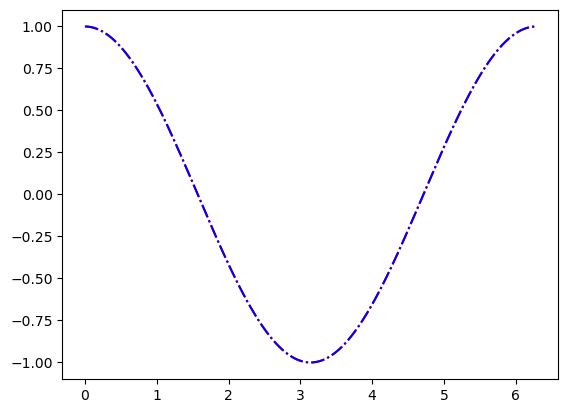

In [26]:
print(np.shape(theta[1:-1]), np.shape(z_calc))
import matplotlib.pyplot as plt
plt.figure()
plt.plot(theta[1:-1], z_calc, 'r-.')
plt.plot(theta, z_true, 'b-.')
plt.show

In [27]:
y = np.cos(theta)
t_true = -np.sin(theta)
t_calc = bruno.deriv1d(y, dtheta)

<function matplotlib.pyplot.show(close=None, block=None)>

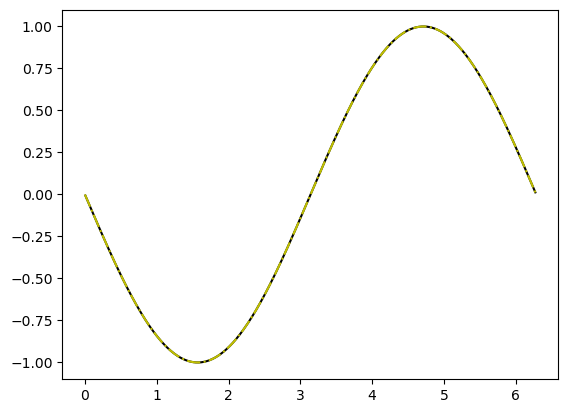

In [50]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(theta[1:-1], t_calc, 'k-')
plt.plot(theta, t_true, 'y-.')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

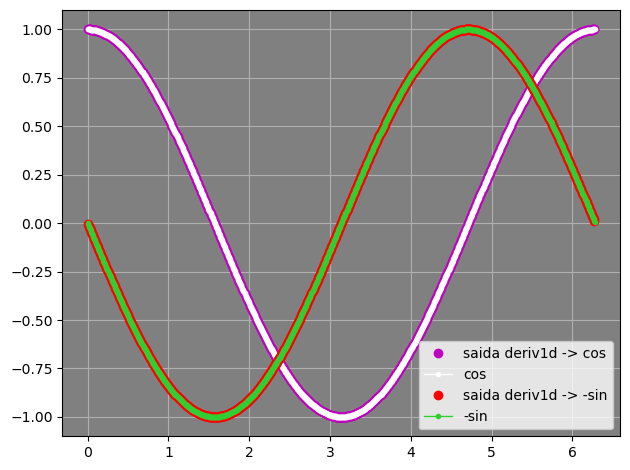

In [49]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(theta[1:-1:], z_calc, 'om', label = 'saida deriv1d -> cos', lw = 2)
plt.plot(theta, z_true, 'w.-', label = 'cos', lw = 1)
plt.plot(theta[1:-1], t_calc,'or', label = 'saida deriv1d -> -sin', lw = 2)
plt.plot(theta, t_true, color='#32CD32', marker='.', label = '-sin', lw = 1)
plt.legend()
plt.gca().set_facecolor('gray')
plt.tight_layout()
plt.grid()
plt.show

In [46]:
import numpy.testing as npt
# Teste da função deriv1d
def test_deriv1d():
    dtheta = 2. * np.pi / 1000
    theta = np.arange(0., 2. * np.pi, dtheta)
    y = np.sin(theta)
    z_true = np.cos(theta)
    
    # Cria a derivada com espaçamento dtheta
    z_calc = bruno.deriv1d(y, dtheta)
    
    # Compare com a derivada verdadeira
    # Compare com valores reais excluindo as bordas
    u = str(npt.assert_almost_equal(z_calc, z_true[1:len(z_true)-1], decimal=5, err_msg='Teste Faliu!')) #só vai até a 5ª casa decimal    
    
    if u == 'None':
        print("Teste passou com sucesso!")
    else:
        print('Teste faliu!')

# Run the test
test_deriv1d()

Teste passou com sucesso!
